In [2]:
import numpy as np
import pandas as pd
import random as rd


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.linear_model import Perceptron


In [7]:
train_df = pd.read_csv('train.csv')

In [8]:
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [9]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [10]:
train_df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train_df.info()
print("__"*20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [15]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [22]:
train_df[['Age','Survived']].groupby(['Age'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)


,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000


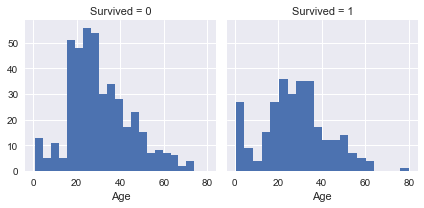

In [23]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

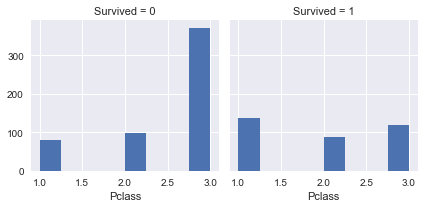

In [24]:
g = sns.FacetGrid(train_df, col='Survived', )
g.map(plt.hist, 'Pclass', bins=8)

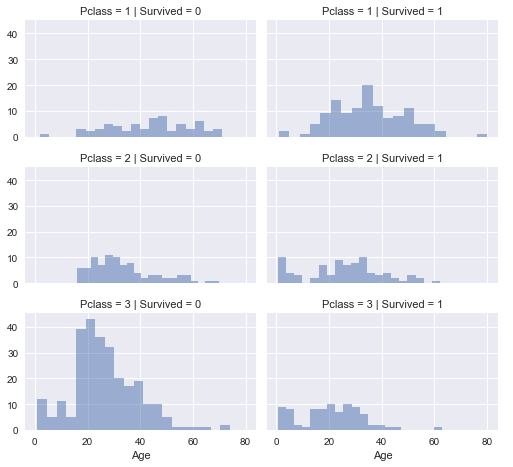

In [25]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

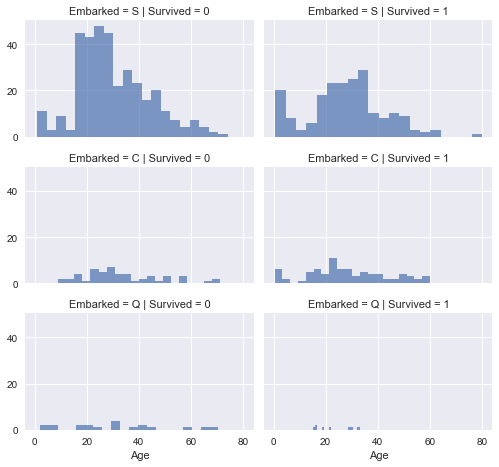

In [26]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.7, bins=20)

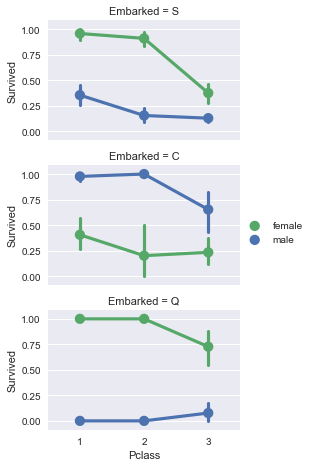

In [27]:
grid = sns.FacetGrid(train_df, row='Embarked',size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()


In [28]:
print("Before : ", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After : ", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

('Before : ', (891, 12), (418, 11), (891, 12), (418, 11))
('After : ', (891, 10), (418, 9), (891, 10), (418, 9))


In [29]:
pd.crosstab(train_df['Sex'], train_df['Survived'])


Survived,0,1
Sex,,
female,81,233
male,468,109


In [30]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [31]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [59]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title','Age','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Age,Survived
0,Master,4.574167,0.575000
1,Miss,21.845638,0.702703
2,Mr,32.368090,0.156673
3,Mrs,35.788991,0.793651
4,Rare,45.545455,0.347826


In [61]:
train_df.groupby(['Title','Survived'], as_index=False).count()

,Title,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,Master,0,17,17,17,17,15,17,17,17,17
1,Master,1,23,23,23,23,21,23,23,23,23
2,Miss,0,55,55,55,55,41,55,55,55,55
3,Miss,1,130,130,130,130,108,130,130,130,129
4,Mr,0,436,436,436,436,331,436,436,436,436
5,Mr,1,81,81,81,81,67,81,81,81,81
6,Mrs,0,26,26,26,26,23,26,26,26,26
7,Mrs,1,100,100,100,100,86,100,100,100,99
8,Rare,0,15,15,15,15,14,15,15,15,15
9,Rare,1,8,8,8,8,8,8,8,8,8


In [62]:
title_mapping = {"Mr": 1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [68]:
train_df[['Title','PassengerId']].groupby(['Title'], as_index=False).count()

,Title,PassengerId
0,1,517
1,2,185
2,3,126
3,4,40
4,5,23


In [70]:
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


In [71]:
train_df = train_df.drop(['Name','PassengerId'], axis=1)
test_df = test_df.drop(['PassengerId'], axis=1)

combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [72]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({"female":1, "male":0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [73]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,S,3
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,Q,1
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,S,3


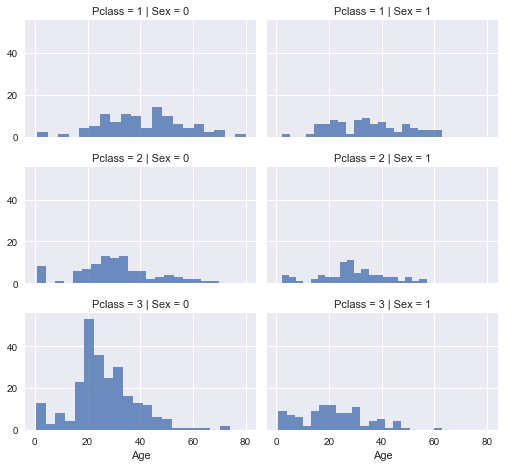

In [78]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age',alpha=.8, bins=20)

grid.add_legend()

In [79]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [81]:
for dataset in combine:
    print(dataset)

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare Embarked  Title
0           0       3    0  22.0      1      0    7.2500        S      1
1           1       1    1  38.0      1      0   71.2833        C      3
2           1       3    1  26.0      0      0    7.9250        S      2
3           1       1    1  35.0      1      0   53.1000        S      3
4           0       3    0  35.0      0      0    8.0500        S      1
5           0       3    0   NaN      0      0    8.4583        Q      1
6           0       1    0  54.0      0      0   51.8625        S      1
7           0       3    0   2.0      3      1   21.0750        S      4
8           1       3    1  27.0      0      2   11.1333        S      3
9           1       2    1  14.0      1      0   30.0708        C      3
10          1       3    1   4.0      1      1   16.7000        S      2
11          1       1    1  58.0      0      0   26.5500        S      2
12          0       3    0  20.0      0      0    8

In [85]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

            

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1
